# Cleaning Visualization

After we have all datasets downloaded, we perform data cleaning on all of them. In this page, we will demonstrate steps and visualizations while data cleaning only on some datasets instead of all datasets to avoid large duplication of visualizations. 

## Cleaning Visualization on Dataset 4
### Read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

data4 = pd.read_csv('Dataset4-Violent_Crime_Property_Crime_Statewide_Totals_1975_to_Present.csv')
data4[:5]


,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Maryland,01/01/1975 12:00:00 AM,4098000,435,1288,14104,13251,57936,134001,21192,...,1413.8,3269.9,517.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maryland,01/01/1976 12:00:00 AM,4144000,352,1327,12247,12322,56351,134337,17772,...,1359.8,3241.7,428.9,-20%,1.9%,-14.1%,-8%,-3.8%,-0.9%,-17.1%
2,Maryland,01/01/1977 12:00:00 AM,4139000,333,1439,12088,14856,57938,131516,17732,...,1399.8,3177.5,428.4,-5.3%,8.6%,-1.2%,20.7%,2.9%,-2%,-0.1%
3,Maryland,01/01/1978 12:00:00 AM,4143000,338,1476,12828,15686,58901,134012,17599,...,1421.7,3234.7,424.8,1.4%,2.5%,6%,5.5%,1.6%,1.8%,-0.8%
4,Maryland,01/01/1979 12:00:00 AM,4149000,406,1628,13745,17337,62657,145278,20217,...,1510.2,3501.5,487.3,19.9%,10.1%,7%,10.4%,6.2%,8.2%,14.7%


From the table above, it seems that there are several columns with empty values. Then we try to use visualizations to determine where exactly missing values are.

### Missing Values

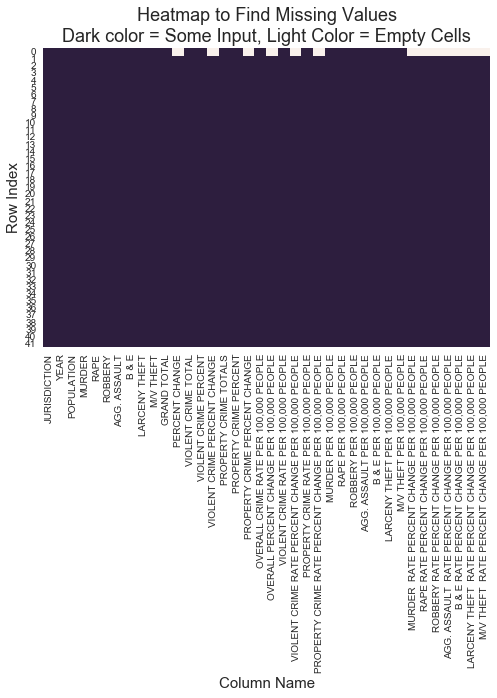

In [87]:
old = data4.columns
new = []
for c in old:
    new.append(c.replace('\n', ''))
data4.columns = new

sns.heatmap(data4.isnull()==False, cbar = False)

plt.xlabel('Column Name', fontsize=15)
plt.ylabel('Row Index', fontsize=15)
plt.title('Heatmap to Find Missing Values\nDark color = Some Input, Light Color = Empty Cells', fontsize=18)
plt.show()
plt.close()

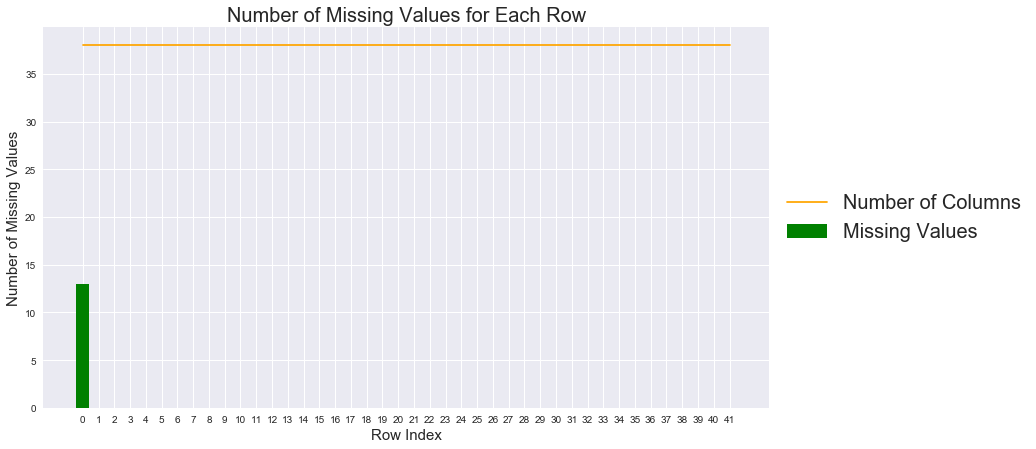

In [88]:
cols = data4.columns
number_empty_cells = []
for i in range(len(data4)):
    number_empty_cells.append(sum(pd.isnull(data4.iloc[i])))
    
number_empty_cells

n = len(data4)
x = np.arange(n)
plt.figure(figsize=(13,7))
plt.bar(x, height= number_empty_cells, color = 'green')
plt.xticks(x, x)
plt.plot([len(cols)]*len(data4), color = 'orange')
plt.xlabel('Row Index', fontsize=15)
#plt.ylim(0,27)
plt.ylabel('Number of Missing Values', fontsize=15)
plt.title('Number of Missing Values for Each Row', fontsize=20)
plt.legend([ 'Number of Columns', 'Missing Values'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
#plt.grid()
plt.show()
plt.close()

From the above heatmap and bar graph, we can know that all missing values are at row 0 (first row) and there are total 13 of them. Then we look at the data more closely and find out that all columns with the first value missing are various kinds of *Percent Changes*. This dataset contains time series crime data in Maryland so it is normal to not have any valid value for percent changes in the first year. Thus, we decide to leave these missing values in the dataset4.  

### Outliers

Then we want to check if there is any extreme value or outlier in dataset4. We will only use the first 10 columns for later visual exploratory data analysis so we will only plot the trends through years on these columns.  

In [120]:
data4.columns[:10]

Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT'],
      dtype='object')

In [109]:
data4['Date'] = [x[:10] for x in list(data4['YEAR'])]
data4.index = data4['Date']

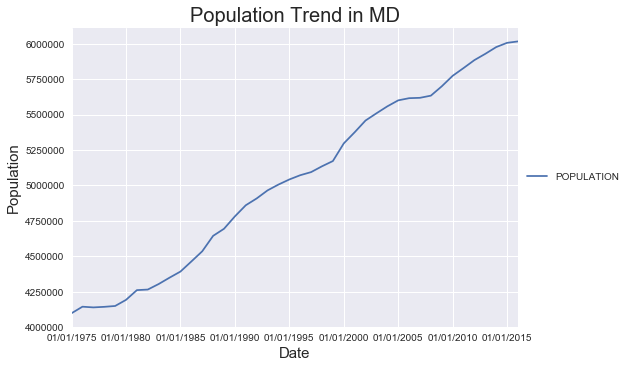

In [123]:
subdata1 = data4['POPULATION']
subdata2 = data4[['MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT']]
subdata3 = data4['RAPE']
subdata4 = data4['LARCENY THEFT']

subdata1.plot()
plt.xlabel('Date', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Population Trend in MD', fontsize=20)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()


The trend of population in Maryland is positive and we don't see any extreme value in this trend.

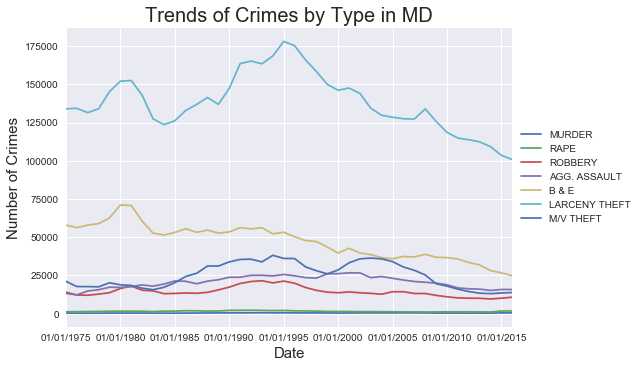

In [124]:
subdata2 = data4[['MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT']]
subdata2.plot()
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Crimes', fontsize=15)
plt.title('Trends of Crimes by Type in MD', fontsize=20)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
plt.show()
plt.close()

Although all trends of different types of crimes in Maryland are not monotonically increasing or monotonically decreasing, we don't see any extreme value in all trend lines. Thus, we conclude that this dataset is clean enough for further analysis.  

## Cleaning Visualization on Dataset 5
### Read data

In [11]:
data5 = pd.read_csv('Dataset5-Violent_Crime_Property_Crime_by_County_1975_to_Present.csv')
data5[:5]

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,01/01/1975 12:00:00 AM,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,01/01/1976 12:00:00 AM,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7%,-62%,13.9%,-50.9%,-17.6%,-7.8%,-25.5%
2,Allegany County,01/01/1977 12:00:00 AM,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3%,257.8%,36.3%,47.3%,4.2%,2.7%,42.8%
3,Allegany County,01/01/1978 12:00:00 AM,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8%,-70.7%,-42.2%,-2.2%,-6.5%,2.7%,0.7%
4,Allegany County,01/01/1979 12:00:00 AM,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3%,251.1%,0.3%,4%,-6.6%,16.3%,-0.7%


### Missing Values

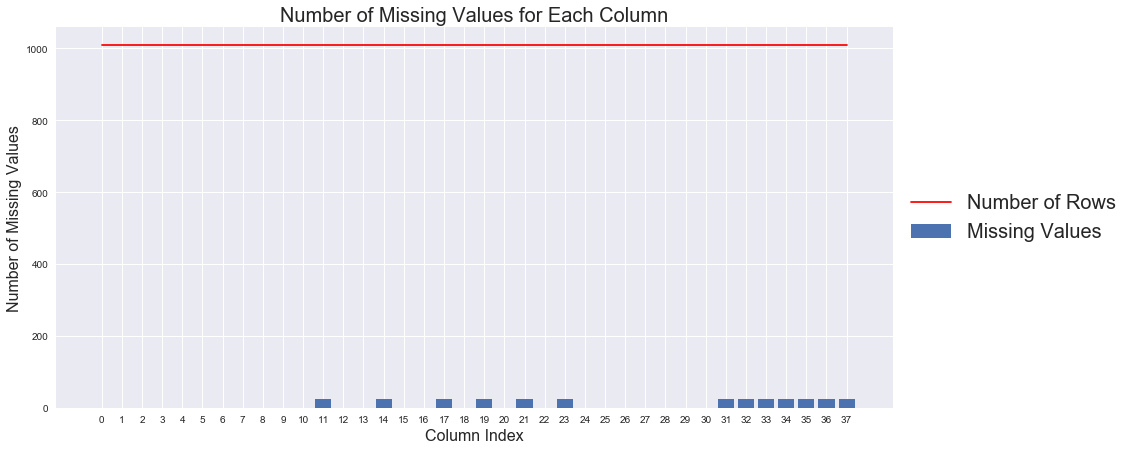

In [12]:
cols = data5.columns
number_empty_cells = []
for c in cols:
    number_empty_cells.append(sum(pd.isnull(data5[c])))

n = len(cols)
x = np.arange(n)
plt.figure(figsize=(15,7))
plt.bar(x, height= number_empty_cells)
plt.xticks(x, x)
plt.plot([len(data5)]*len(cols), color = 'red')
plt.xlabel('Column Index', fontsize=16)
#plt.ylim(0,40)
plt.ylabel('Number of Missing Values', fontsize=16)
plt.title('Number of Missing Values for Each Column', fontsize=20)
plt.legend([ 'Number of Rows', 'Missing Values'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
#plt.grid()
#plt.savefig('data5-MissingValueCol.png')
plt.show()
plt.close()

Here, we look at the number of missing values for each column. We found out that 13 columns have missing values and they all have the same amount of missing values.   

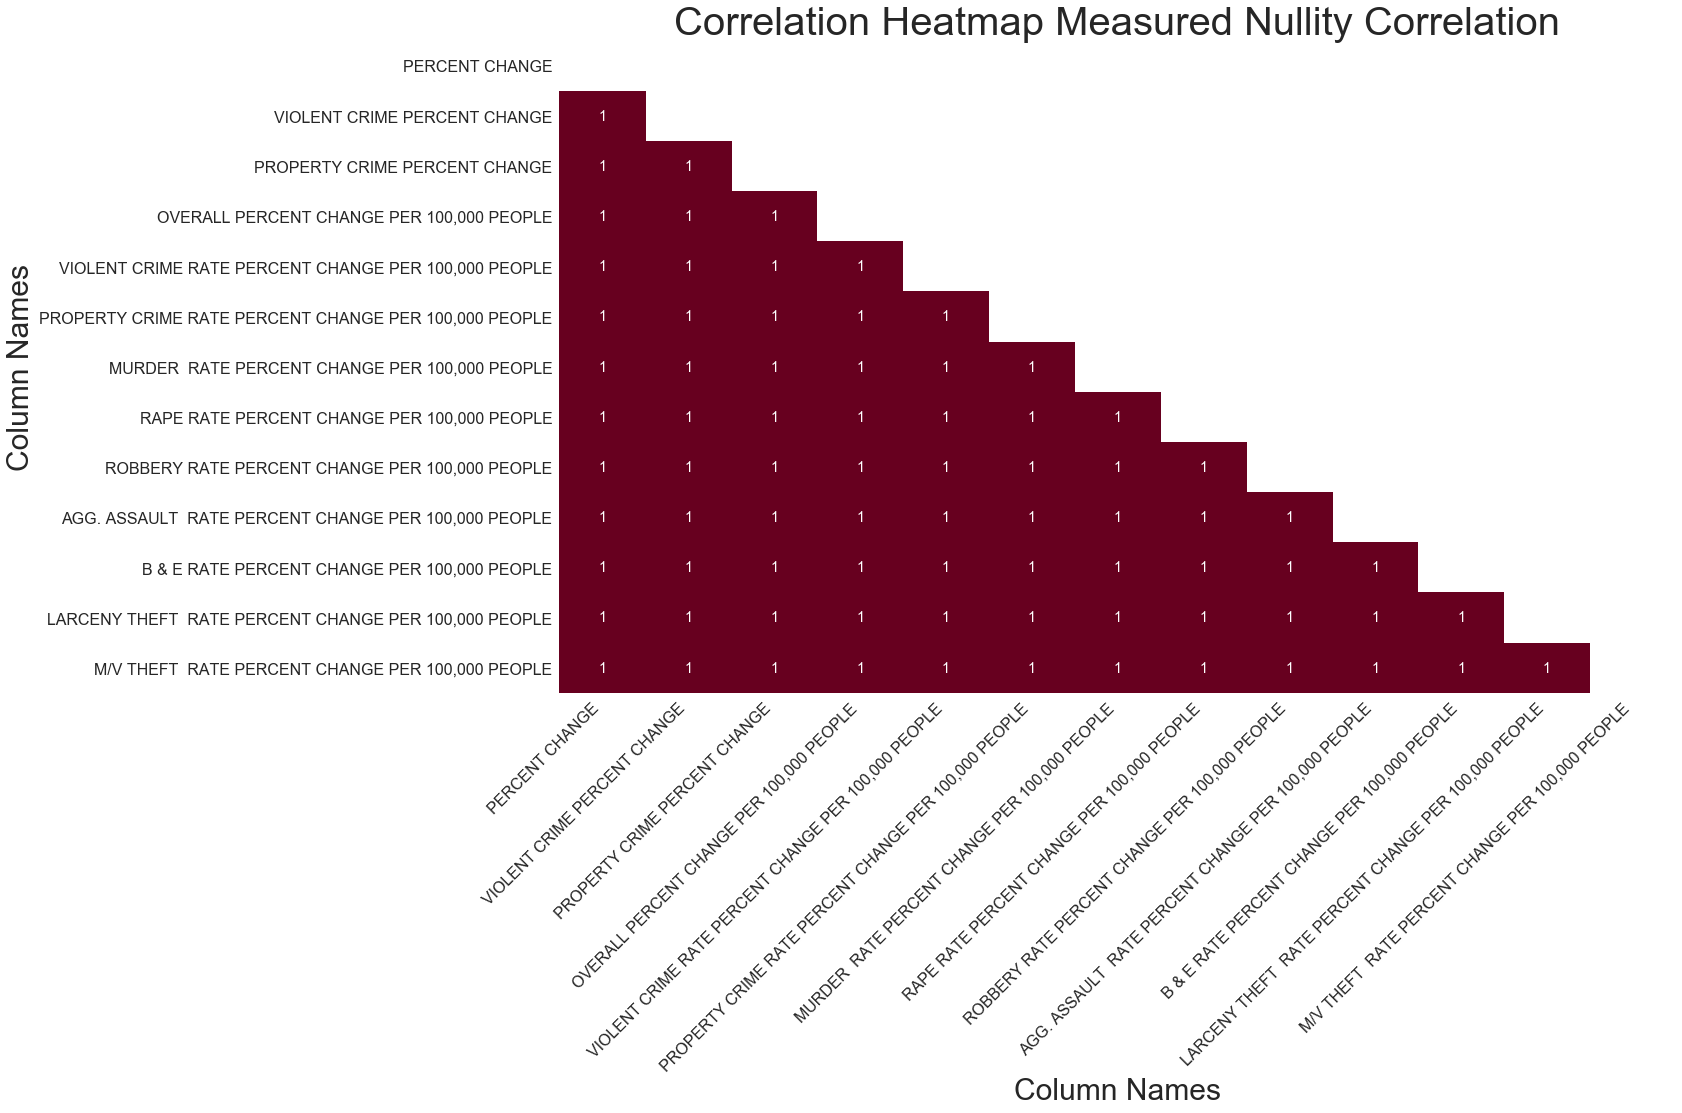

In [18]:
msno.heatmap(data5)
plt.xlabel('Column Names', fontsize=30)
plt.ylabel('Column Names', fontsize=30)
plt.title('Correlation Heatmap Measured Nullity Correlation', fontsize=40)
plt.show()
plt.close()

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another. Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).[1]  
**Please note:** Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.


In this dataset, it seems that the heatmap reports there are 13 columns with absolute nullity correlation, which means, if one of these 13 columns has empty value at a row, then all other 12 columns will definitely have empty values at this row.  

Again, we find out that all these 13 columns are different kinds of *Percent Changes*. So we want to verify if all empty values happen in rows where its *YEAR* equals to the beginning year, 1975.

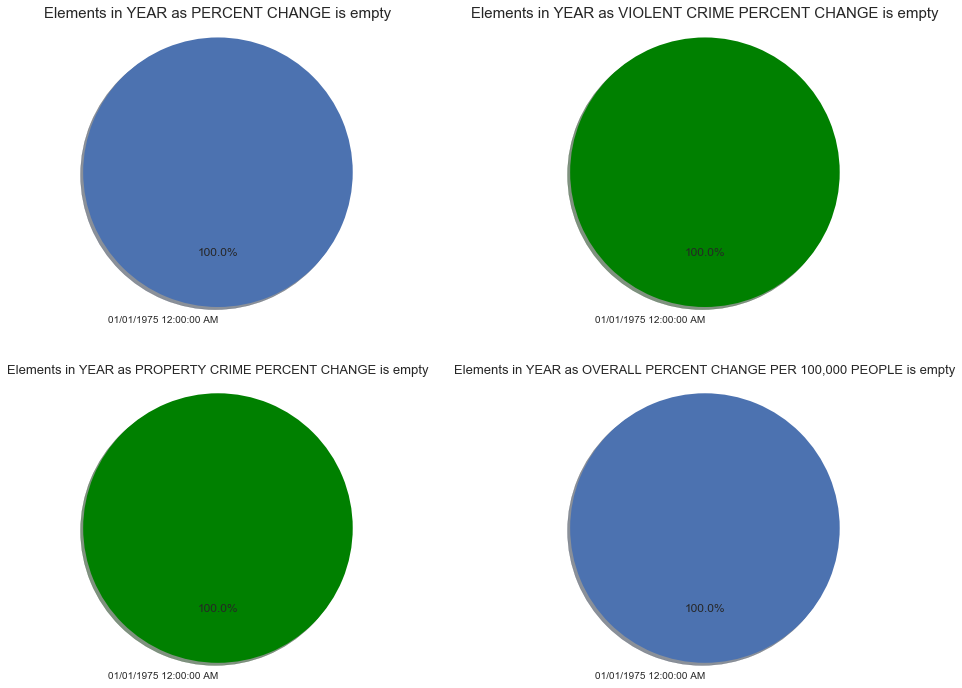

In [81]:
test1 = data5[data5['PERCENT CHANGE'].isnull()]
year1 = test1['YEAR']
labels1 = list(set(year1))
sizes1 = [len(year1)]

test2 = data5[data5['VIOLENT CRIME PERCENT CHANGE'].isnull()]
year2 = test2['YEAR']
labels2= list(set(year2))
sizes2 = [len(year2)]

test3 = data5[data5['PROPERTY CRIME PERCENT CHANGE'].isnull()]
year3 = test3['YEAR']
labels3 = list(set(year3))
sizes3 = [len(year3)]

test4 = data5[data5['OVERALL PERCENT CHANGE PER 100,000 PEOPLE'].isnull()]
year4 = test4['YEAR']
labels4 = list(set(year4))
sizes4 = [len(year4)]


f, axarr = plt.subplots(2, 2, figsize=(16,12))
axarr[0][0].pie(sizes1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90)
axarr[0][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[0][0].set_title('Elements in YEAR as PERCENT CHANGE is empty', fontsize=15)

axarr[0][1].pie(sizes2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90, colors = 'green')
axarr[0][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[0][1].set_title('Elements in YEAR as VIOLENT CRIME PERCENT CHANGE is empty', fontsize=15)

axarr[1][0].pie(sizes3, labels=labels3, autopct='%1.1f%%', shadow=True, startangle=90, colors = 'green')
axarr[1][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[1][0].set_title('Elements in YEAR as PROPERTY CRIME PERCENT CHANGE is empty', fontsize=13)

axarr[1][1].pie(sizes4, labels=labels4, autopct='%1.1f%%', shadow=True, startangle=90)
axarr[1][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[1][1].set_title('Elements in YEAR as OVERALL PERCENT CHANGE PER 100,000 PEOPLE is empty', fontsize=13)

plt.show()        
plt.close()

From the above pie charts, we can clearly see that *YEAR* column only contains 1975 when one of *PERCENT CHANGE* columns are empty. Since 1975 is the beginning year, then it is reasonable for all missing values of *PERCENT CHANGE*  in this dataset5.  

## cleaning visualization on dataset 2
### Read data

In [3]:
data2 = pd.read_csv('Dataset2-Crime_type_in_MD_with_lat_lng.csv')

C:\Users\45336\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Missing Values

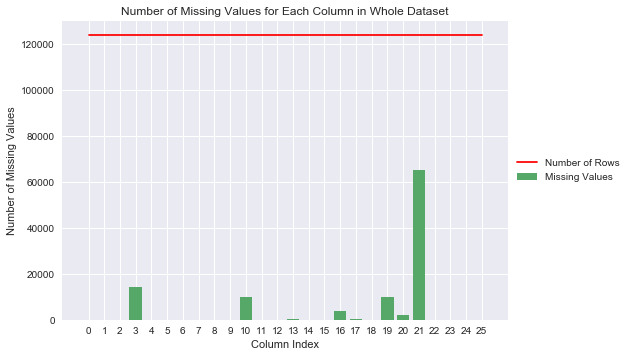

In [6]:
cols = data2.columns
number_empty_cells = []
for c in cols:
    number_empty_cells.append(sum(pd.isnull(data2[c])))

n = len(cols)
x = np.arange(n)
plt.bar(x, height= number_empty_cells)
plt.xticks(x, x)
plt.plot([len(data2)]*len(cols), color = 'red')
plt.xlabel('Column Index', fontsize = 15)
plt.ylabel('Number of Missing Values', fontsize = 15)
plt.title('Number of Missing Values for Each Column in Whole Dataset', fontsize = 20)
plt.legend([ 'Number of Rows', 'Missing Values'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size':15})
#plt.grid()
plt.show()
plt.close()

Here is a plot showing the number of missing values for each column. We see that there are most missing values in the 21st column.  
But we only need a few columns for further plotting. Thus, I will just keep ['Dispatch Date/Time', 'Victims', 'Crime Name1', 'Start Date/Time', 'End Date/Time'] those columns.

In [7]:
data2 = data2.iloc[:,[3,5,6,20,21]]

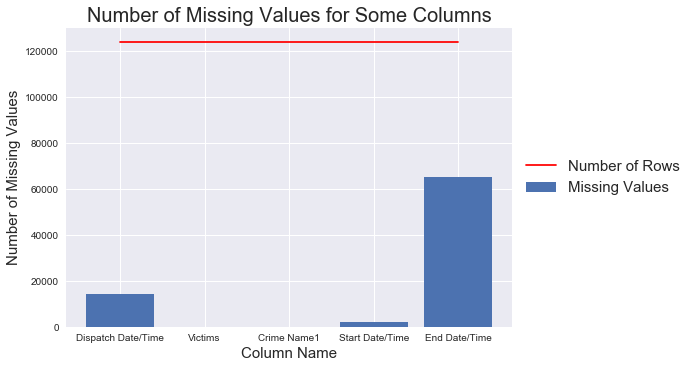

In [18]:
cols = data2.columns
number_empty_cells1 = []
for c in cols:
    number_empty_cells1.append(sum(pd.isnull(data2[c])))

n = len(cols)
x = np.arange(n)
plt.bar(x, height= number_empty_cells1)
plt.xticks(x, ['Dispatch Date/Time', 'Victims', 'Crime Name1', 'Start Date/Time', 'End Date/Time'] )
plt.plot([len(data2)]*len(cols), color = 'red')
plt.xlabel('Column Name', fontsize = 15)
plt.ylabel('Number of Missing Values', fontsize = 15)
plt.title('Number of Missing Values for Some Columns', fontsize = 20)
plt.legend([ 'Number of Rows', 'Missing Values'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size':15})
#plt.grid()
plt.show()
plt.close()

Here is the bar plot showing the number of missing values for these five columns before cleaning. Below are the specific numbers of missing values.   

In [35]:
print('Dispatch Date/Time    Victims    Crime Name1    Start Date/Time    End Date/Time \n{}\t\t      {}\t\t {}\t\t{}\t\t   {}'.format(number_empty_cells1[0],number_empty_cells1[1],number_empty_cells1[2],number_empty_cells1[3],number_empty_cells1[4]))

Dispatch Date/Time    Victims    Crime Name1    Start Date/Time    End Date/Time 
14232		      0		 23		1952		   65089


### Data Cleaning

Since we only need 'Start Date/Time' as *time measure* for further part of this project, we will fill 'Start Date/Time' with other two *time measure* columns.

In [36]:
crime_clean = data2
# fill one time columns with other time columns
for i in range(len(crime_clean)):
    if (pd.isnull(crime_clean.iloc[i,3])) and (not pd.isnull(crime_clean.iloc[i,4])):
        crime_clean.iloc[i,3] = crime_clean.iloc[i,4]
    elif (pd.isnull(crime_clean.iloc[i,3])) and (not pd.isnull(crime_clean.iloc[i,0])):
        crime_clean.iloc[i,3] = crime_clean.iloc[i,0]


### Plots with Clean Data

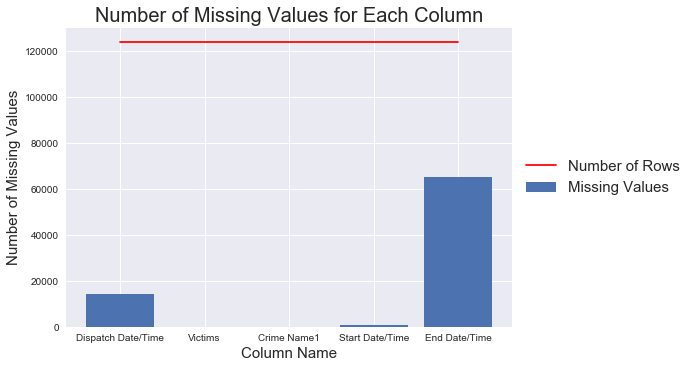

In [37]:
cols = crime_clean.columns
number_empty_cells2 = []
for c in cols:
    number_empty_cells2.append(sum(pd.isnull(crime_clean[c])))

n = len(cols)
x = np.arange(n)
plt.bar(x, height= number_empty_cells2)
plt.xticks(x, ['Dispatch Date/Time', 'Victims', 'Crime Name1', 'Start Date/Time', 'End Date/Time'])
plt.plot([len(crime_clean)]*len(cols), color = 'red')
plt.xlabel('Column Name', fontsize = 15)
plt.ylabel('Number of Missing Values', fontsize = 15)
plt.title('Number of Missing Values for Each Column', fontsize = 20)
plt.legend([ 'Number of Rows', 'Missing Values'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size':15})
#plt.grid()
plt.show()
plt.close()

In [38]:
print('Dispatch Date/Time    Victims    Crime Name1    Start Date/Time    End Date/Time \n{}\t\t      {}\t\t {}\t\t{}\t\t   {}'.format(number_empty_cells2[0],number_empty_cells2[1],number_empty_cells2[2],number_empty_cells2[3],number_empty_cells2[4]))

Dispatch Date/Time    Victims    Crime Name1    Start Date/Time    End Date/Time 
14232		      0		 23		957		   65089


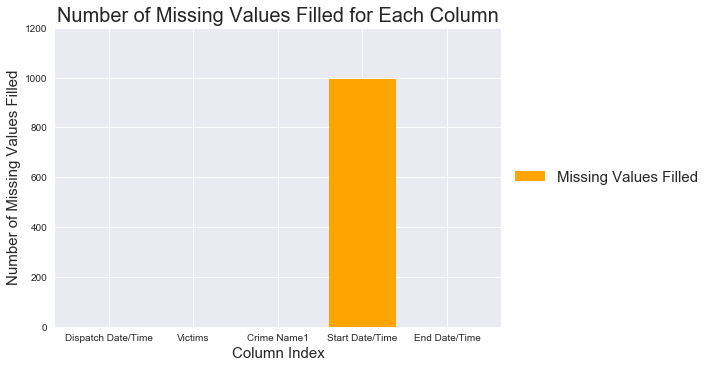

In [39]:
cols = crime_clean.columns
diff = [a-b for a,b in list(zip(number_empty_cells1, number_empty_cells2))]

n = len(cols)
x = np.arange(n)
plt.bar(x, height= diff, color='orange')
plt.xticks(x, ['Dispatch Date/Time', 'Victims', 'Crime Name1', 'Start Date/Time', 'End Date/Time'])
plt.ylim(0, 1200)
plt.xlabel('Column Name', fontsize = 15)
plt.ylabel('Number of Missing Values Filled', fontsize = 15)
plt.title('Number of Missing Values Filled for Each Column', fontsize = 20)
plt.legend([ 'Missing Values Filled'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size':15})
#plt.grid()
plt.show()
plt.close()

Comparing the plot after cleaning with the plot before cleaning, and looking at the plot of missing values filled, we can clearly see that the number of missing values in the *Start Date/Time* column has decreased by about 1000.  

### Create a new dataframe and check missing values

We also need an additional dataframe containing only the start date and time. After we create the new dataframe, we need to check wether there is any missing value or outlier. 

In [45]:
import time

dates = crime_clean.iloc[:,3]
# After cleaning nan, there are 122153 crimes have time
dates = dates.dropna() 
crime1 = pd.DataFrame(dates)
date_split = dates.apply(lambda x: time.strptime(x, "%m/%d/%Y %I:%M:%S %p"))   
crime1['month'] = date_split.apply(lambda x: time.strftime("%m", x ))
crime1['day'] = date_split.apply(lambda x: time.strftime("%d", x ))
crime1['year'] = date_split.apply(lambda x: time.strftime("%Y", x ))
crime1['hour'] = date_split.apply(lambda x: time.strftime("%H", x ))

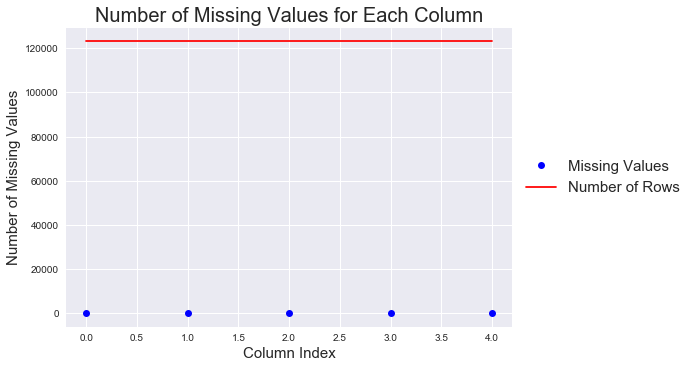

In [46]:
cols = crime1.columns
number_empty_cells = []
for c in cols:
    number_empty_cells.append(sum(pd.isnull(crime1[c])))

plt.plot(number_empty_cells,'bo')
plt.plot([len(crime1)]*len(cols), color = 'red')
#plt.grid()
plt.xlabel('Column Index', fontsize = 15)
plt.ylabel('Number of Missing Values', fontsize = 15)
plt.title('Number of Missing Values for Each Column', fontsize = 20)
plt.legend(['Missing Values', 'Number of Rows'], loc = 'center left', bbox_to_anchor=(1, 0.5), prop={'size':15})
plt.show()
plt.close()

Thus, there is no missing value in our new dataframe about start date and time.  

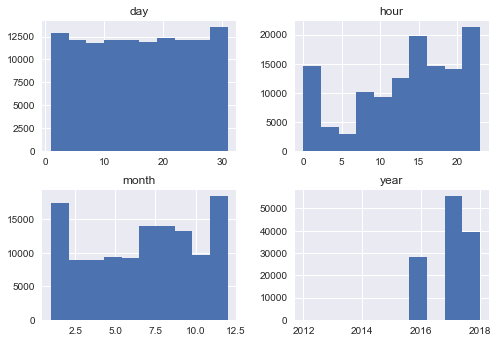

<function matplotlib.pyplot.close>

In [66]:
crime2 = crime1.iloc[:,[1,2,3,4]]
crime2 = crime2.astype(int)
crime2.hist()
#plt.xlabel('Column Index', fontsize = 15)
#plt.ylabel('Number of Missing Values', fontsize = 15)
#plt.title('Distribution', fontsize = 20)
plt.show()
plt.close

From above histgrams, we see that the range for *day* column is from 1 to 31. For *month* column, the range is from 1 to 2. For *hour* column, the range is from 0 to 23. The ranges are all reasonable so there is no outlier in this dataframe.  

## Reference

[1]https://github.com/ResidentMario/missingno/blob/master/README.md

If you want to see all code, please click here. 